In [10]:
import pandas as pd
import matplotlib.pyplot as plt

#import only second sheet
df = pd.read_excel('new_format-2020 (3).xlsx', sheet_name='SupIm')
df['date'] = pd.date_range(start='1/1/2020', periods=len(df), freq='H')
df = df.set_index('date')

#view DataFrame: all the data
#df

#view DataFrame head: some elements of the data
print(df.head)
#print(list(df))

#view columns
#print(df.columns)

<bound method NDFrame.head of                         t  SouthWest.Wind (m/s)  SouthWest.Solar (kJ/m2)  \
date                                                                       
2020-01-01 00:00:00     0              6.471513                      0.0   
2020-01-01 01:00:00     1              7.327003                      0.0   
2020-01-01 02:00:00     2              8.556605                      0.0   
2020-01-01 03:00:00     3              7.579646                      0.0   
2020-01-01 04:00:00     4              7.816800                      0.0   
...                   ...                   ...                      ...   
2020-12-30 19:00:00  8755             17.370674                      0.0   
2020-12-30 20:00:00  8756             17.697677                      0.0   
2020-12-30 21:00:00  8757             16.061313                      0.0   
2020-12-30 22:00:00  8758             15.209872                      0.0   
2020-12-30 23:00:00  8759             14.274141           

## Plot wind data & solar data

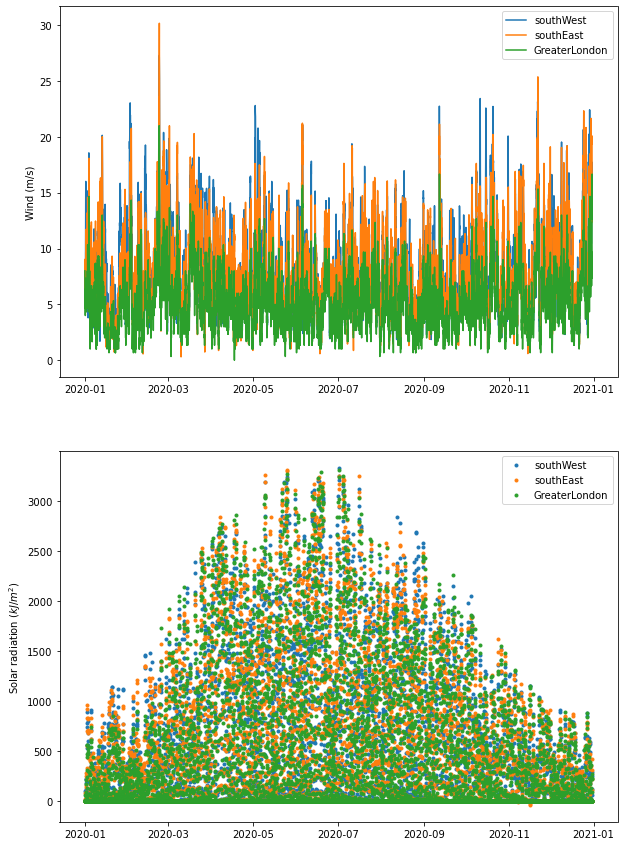

In [16]:
#create dataframes for wind data, for each region
df_southWest_wind = df['SouthWest.Wind (m/s)']
df_southEast_wind = df['SouthEast.Wind (m/s)']
df_GreaterLondon_wind = df['GreaterLondon.Wind (m/s)']

#create dataframes for solar data, for each region
df_southWest_solar = df['SouthEast.Solar (kJ/m2)']
df_southEast_solar = df['SouthWest.Solar (kJ/m2)']
df_GreaterLondon_solar = df['GreaterLondon.Solar (kJ/m2)']

#create figure, and axes
fig,ax =  plt.subplots(2,figsize=(10,15))
ax[0].plot(df_southWest_wind,'-',label='southWest')
ax[0].plot(df_southEast_wind,'-',label='southEast')
ax[0].plot(df_GreaterLondon_wind,'-',label='GreaterLondon')
ax[1].plot(df_southWest_solar,'.',label='southWest')
ax[1].plot(df_southEast_solar,'.',label='southEast')
ax[1].plot(df_GreaterLondon_solar,'.',label='GreaterLondon')

ax[0].set_ylabel('Wind (m/s)')
ax[1].set_ylabel('Solar radiation ($kJ/m^2$)')
ax[0].legend()
ax[1].legend()

# Average data by hour of the day

In [5]:
#Average data by hour of the day
dfh = df.groupby(df.index.hour).mean()
dfh

,t,SouthWest.Wind (m/s),SouthWest.Solar (kJ/m2),SouthEast.Wind (m/s),SouthEast.Solar (kJ/m2),GreaterLondon.Wind (m/s),GreaterLondon.Solar (kJ/m2)
date,,,,,,,
0,4368.0,7.101628,0.000000,6.956877,0.000000,4.625571,0.000000
1,4369.0,7.118614,0.000000,6.923584,0.000000,4.627397,0.000000
2,4370.0,7.119768,0.000000,6.765219,0.000000,4.479452,0.000000
3,4371.0,7.148927,0.000000,6.800566,0.000000,4.509589,0.000000
4,4372.0,7.143658,0.012068,6.771759,0.222024,4.410959,0.010046
5,4373.0,7.129441,9.296835,6.757101,12.638244,4.356164,8.995434
6,4374.0,7.207263,69.052964,6.784588,74.482988,4.503196,65.620091
7,4375.0,7.446848,209.504546,7.172488,216.902151,4.726027,205.097717
8,4376.0,7.945249,425.603595,7.756370,444.607785,5.021005,421.598174


## Plotting annual average for each hour of the day

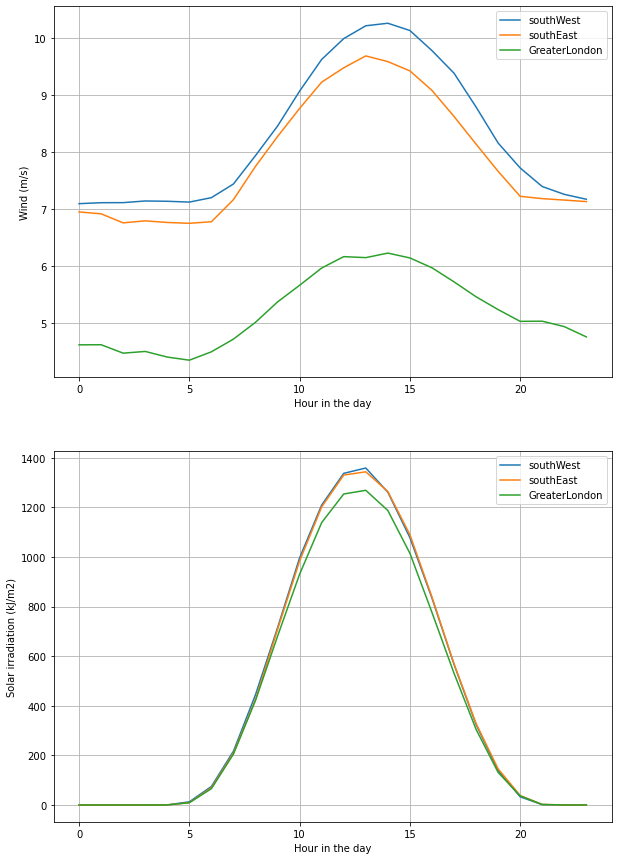

In [6]:
#create dataframes for wind data, for each region
dfh_southWest_wind = dfh['SouthWest.Wind (m/s)']
dfh_southEast_wind = dfh['SouthEast.Wind (m/s)']
dfh_GreaterLondon_wind = dfh['GreaterLondon.Wind (m/s)']

#create dataframes for solar data, for each region
dfh_southWest_solar = dfh['SouthEast.Solar (kJ/m2)']
dfh_southEast_solar = dfh['SouthWest.Solar (kJ/m2)']
dfh_GreaterLondon_solar = dfh['GreaterLondon.Solar (kJ/m2)']

#create figure, and axes
fig,ax =  plt.subplots(2,figsize=(10,15))



ax[0].plot(dfh_southWest_wind,'-',label='southWest')
ax[0].plot(dfh_southEast_wind,'-',label='southEast')
ax[0].plot(dfh_GreaterLondon_wind,'-',label='GreaterLondon')
ax[1].plot(dfh_southWest_solar,'-',label='southWest')
ax[1].plot(dfh_southEast_solar,'-',label='southEast')
ax[1].plot(dfh_GreaterLondon_solar,'-',label='GreaterLondon')

ax[0].set_ylabel('Wind (m/s)')
ax[0].set_xlabel('Hour in the day')
ax[1].set_ylabel('Solar irradiation (kJ/m2)')
ax[1].set_xlabel('Hour in the day')

ax[0].grid()
ax[0].legend()
ax[1].grid()
ax[1].legend()